<a href="https://colab.research.google.com/github/anmol-iisc/psa_dspi_rmdn12/blob/main/Assignment2_1_25Sep_1004PM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Assignment 2: Exploratory Data Analysis on Diabetes Dataset

## Background
Diabetes is one of the most prevalent chronic diseases and creates significant burdens on healthcare systems. The **Diabetes 130-US hospitals dataset** contains over **100,000 records** of hospital admissions for diabetic patients across **130 U.S. hospitals (1999–2008)**. It includes more than **50 attributes**, covering demographics, admission details, diagnoses, lab results, medications, and hospital outcomes.  

Like many real-world healthcare datasets, it presents challenges such as missing values, categorical codes (ICD-9 diagnoses, drug prescriptions), imbalances in outcome variables (e.g., readmission), and inconsistent data formats. Conducting an in-depth **Exploratory Data Analysis (EDA)** will help uncover insights into patient demographics, treatment outcomes, and factors influencing readmission rates.  

---

## Objectives
The goal of this assignment is to conduct a comprehensive **qualitative and quantitative EDA** of the Diabetes dataset. You will:  

- **Understand** the dataset structure, including variables, data types, and overall composition.  
- **Detect and address** data quality issues, such as missing values, duplicates, and inconsistent categories.  
- **Conduct univariate, bivariate, and multivariate analysis** using both qualitative and quantitative EDA, supported by visualization techniques (bar charts, count plots, stacked charts, heatmaps) and statistical methods (descriptive statistics, distribution analysis, and exploration of variable relationships).  
- **Visualize** patterns and correlations to uncover key insights and trends.  

---

## Submission Instructions
- This is an **individual assignment** and carries **5% of the total marks** of this course.
- You should not discuss your progress or solutions with anyone else.  
- Use this **template Jupyter Notebook and dataset** for your work.  

At the beginning of the notebook, clearly state:  
1. **Your Name and Roll Number**  
2. **Python environment details** (version, libraries used).  
3. Whether you are running locally or on **Google Colab** (*preferred, to ensure all students work in a consistent environment*).  

Additional guidelines:  
- Ensure that your notebook is **fully reproducible**: every cell must run sequentially without errors to regenerate the results.  
- Submit a **single completed notebook file (.ipynb)** before the deadline.  

---


## Dataset Source
- Source of Data : https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008
- It represents **hospital admissions of diabetic patients** across 130 U.S. hospitals from 1999 to 2008.
- Read the **Variables Table** in the link above, which provides details of individual variables such as type, role, and description.

##  Dataset Overview - "Diabetes_dataset.csv"
- **Number of records:** ~101,766 hospital admissions  
- **Number of features:** 53  
- **Unit of analysis:** Each row represents **one hospital admission** for a patient (a patient can have multiple admissions).  
- **Target variable (Goal):** Predict whether a patient is **readmitted within 30 days** of discharge.  

###  Key Features with Mappings
- **Admission Type**: `admission_type_id` → mapped to `admission_type_desc`  
- **Discharge Disposition**: `discharge_disposition_id` → mapped to `discharge_desc`  
- **Admission Source**: `admission_source_id` → mapped to `admission_source_desc`  

---

##  Important Notes
- **Missing values:** Several features contain missing values, often recorded as `"?"` (not as `NaN`).   
- **ID columns:** Both numeric IDs and their human-readable descriptions are included after merging. IDs may be useful for re-checking or remapping, while descriptions are helpful for analysis.  


**Note:** Do not just run plots — write down **interpretations** of your findings.  
The goal is to practice *thinking about the data*, not just generating charts.


# 📌 Preamble: Environment Details

Before starting the assignment, please fill in the following:

- **Name**: <Your Name>  
- **Roll Number**: <Your Roll Number>  
- **Environment**: Local Machine / Google Colab (choose one)  

Run the code cell below to print your Python and library versions.


In [444]:
# Preamble: Environment Check

import sys
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns

print("Python version:", sys.version)
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)

Python version: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
Pandas version: 2.2.2
NumPy version: 2.0.2
Matplotlib version: 3.10.0
Seaborn version: 0.13.2


## Load and Inspect the dataset structure

In [445]:
df=pd.read_csv("Diabetes_dataset.csv")

In [446]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type_desc,discharge_desc,admission_source_desc
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,NO,NaN,Not Mapped,Physician Referral
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,No,No,No,Ch,Yes,>30,Emergency,Discharged to home,Emergency Room
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,Yes,NO,Emergency,Discharged to home,Emergency Room
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room


In [447]:
df.shape

(101766, 53)

In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [449]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [451]:
df.replace("?", np.nan, inplace=True)

In [452]:
df.isnull().sum()

,0
encounter_id,0
patient_nbr,0
race,2273
gender,0
age,0
weight,98569
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [453]:
percent_missing = df.isnull().sum()*100/len(df)
percent_missing_sorted = percent_missing.sort_values(ascending=False)
percent_missing_sorted

,0
weight,96.858479
max_glu_serum,94.746772
A1Cresult,83.277322
medical_specialty,49.082208
payer_code,39.557416
admission_source_desc,6.663326
admission_type_desc,5.199182
discharge_desc,3.626948
race,2.233555
diag_3,1.398306


In [454]:
df.drop(columns=['weight', 'max_glu_serum', 'A1Cresult', 'payer_code', 'medical_specialty'], inplace=True)

In [455]:
df.shape

(101766, 48)

In [456]:
df['encounter_id'].duplicated().sum()

np.int64(0)

In [457]:
df.drop(columns=['encounter_id'], inplace=True)

In [458]:
df['patient_nbr'].duplicated().sum()

np.int64(30248)

In [459]:
df.shape

(101766, 47)

In [460]:
for col in df.columns:
    #print(col, df[col].duplicated().sum(), df[col].duplicated().sum()/(len(df)-1)*100)
    # print number of unique values per column and sort them in ascending order
    print(col, df[col].nunique())

patient_nbr 71518
race 5
gender 3
age 10
admission_type_id 8
discharge_disposition_id 26
admission_source_id 17
time_in_hospital 14
num_lab_procedures 118
num_procedures 7
num_medications 75
number_outpatient 39
number_emergency 33
number_inpatient 21
diag_1 716
diag_2 748
diag_3 789
number_diagnoses 16
metformin 4
repaglinide 4
nateglinide 4
chlorpropamide 4
glimepiride 4
acetohexamide 2
glipizide 4
glyburide 4
tolbutamide 2
pioglitazone 4
rosiglitazone 4
acarbose 4
miglitol 4
troglitazone 2
tolazamide 3
examide 1
citoglipton 1
insulin 4
glyburide-metformin 4
glipizide-metformin 2
glimepiride-pioglitazone 2
metformin-rosiglitazone 2
metformin-pioglitazone 2
change 2
diabetesMed 2
readmitted 3
admission_type_desc 7
discharge_desc 25
admission_source_desc 16


In [461]:
# Dropping columns having same value across all rows
df.drop(columns=['examide', 'citoglipton'], inplace=True)

In [462]:
df.shape

(101766, 45)

In [463]:
# distinct values in readmitted column
df['readmitted'].value_counts()

,count
readmitted,
NO,54864
>30,35545
<30,11357


In [464]:
df['readmitted_label'] = df['readmitted'].map({'NO':0, '>30':1, '<30':2})

In [465]:
df['readmitted_label'].unique()

array([0, 1, 2])

In [466]:
df.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type_desc,discharge_desc,admission_source_desc,readmitted_label
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,...,No,No,No,No,No,NO,NaN,Not Mapped,Physician Referral,0
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,...,No,No,No,Ch,Yes,>30,Emergency,Discharged to home,Emergency Room,1
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,Yes,NO,Emergency,Discharged to home,Emergency Room,0
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,...,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room,0
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room,0


<Axes: xlabel='readmitted_label', ylabel='count'>

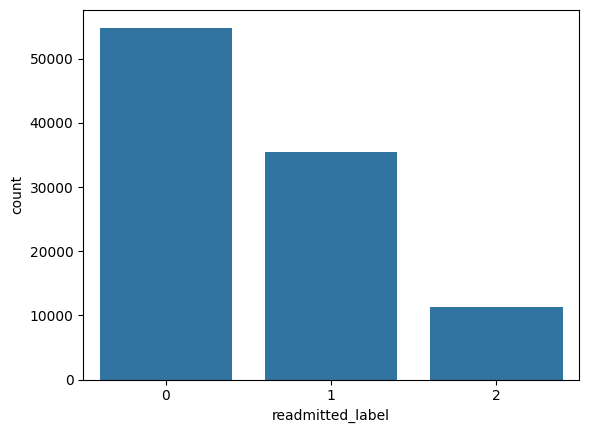

In [467]:
# plot on readmitted label -
sns.countplot(data=df, x='readmitted_label') # frequency - count

In [468]:
df.isnull().sum()

,0
patient_nbr,0
race,2273
gender,0
age,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
num_lab_procedures,0
num_procedures,0


In [469]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='readmitted', ylabel='age'>

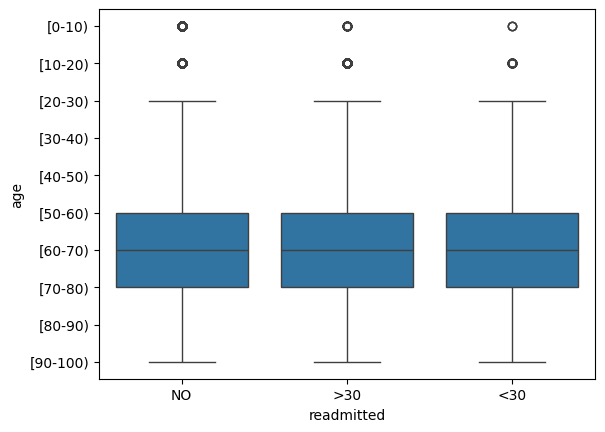

In [470]:
# boxplot of age with readmitted
sns.boxplot(x=df['readmitted'],y=df['age'])

<Axes: xlabel='age', ylabel='count'>

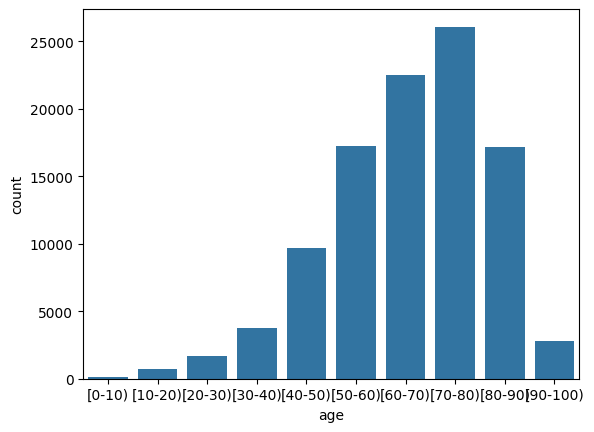

In [471]:
# countplot of Age group
sns.countplot(data=df, x='age')

In [472]:
pd.crosstab(df['age'], df['readmitted'], margins=True)  # cross tabulation of Age_group and survived columns

readmitted,<30,>30,NO,All
age,,,,
[0-10),3,26,132,161
[10-20),40,224,427,691
[20-30),236,510,911,1657
[30-40),424,1187,2164,3775
[40-50),1027,3278,5380,9685
[50-60),1668,5917,9671,17256
[60-70),2502,7897,12084,22483
[70-80),3069,9475,13524,26068
[80-90),2078,6223,8896,17197


In [473]:
pd.crosstab(df['age'], df['readmitted_label'], margins=True)  # cross tabulation of Age_group and survived columns

readmitted_label,0,1,2,All
age,,,,
[0-10),132,26,3,161
[10-20),427,224,40,691
[20-30),911,510,236,1657
[30-40),2164,1187,424,3775
[40-50),5380,3278,1027,9685
[50-60),9671,5917,1668,17256
[60-70),12084,7897,2502,22483
[70-80),13524,9475,3069,26068
[80-90),8896,6223,2078,17197


<Axes: xlabel='readmitted', ylabel='gender'>

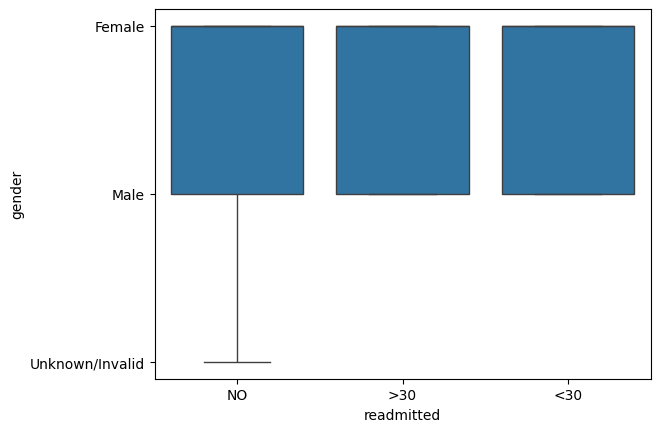

In [474]:
# boxplot of gender with readmitted
sns.boxplot(x=df['readmitted'],y=df['gender'])

<Axes: xlabel='gender', ylabel='count'>

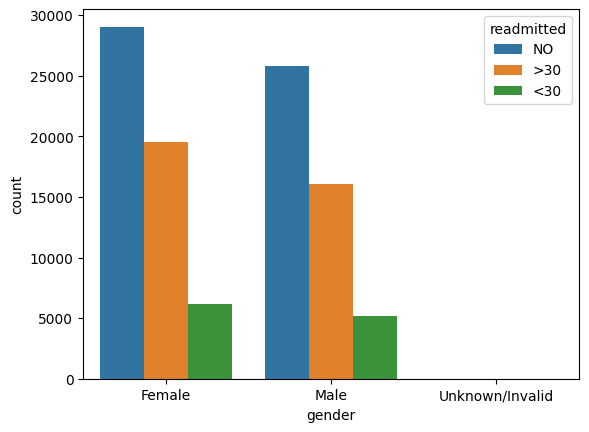

In [475]:
# countplot for gender with readmitted
sns.countplot(data=df, x = 'gender', hue='readmitted')

In [476]:
pd.crosstab(df['gender'], df['readmitted_label'], margins=True)  # cross tabulation of Age_group and survived columns

readmitted_label,0,1,2,All
gender,,,,
Female,29038,19518,6152,54708
Male,25823,16027,5205,47055
Unknown/Invalid,3,0,0,3
All,54864,35545,11357,101766


In [477]:
# compute readmitted by gender - group by gender
readmitted_by_gender = df.groupby('gender')['readmitted_label'].mean()
readmitted_by_gender

##NOTE: Does not make sense!

,readmitted_label
gender,
Female,0.581670
Male,0.561832
Unknown/Invalid,0.000000


/tmp/ipython-input-1815210144.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x='race', y='age', palette='rainbow')


<Axes: xlabel='race', ylabel='age'>

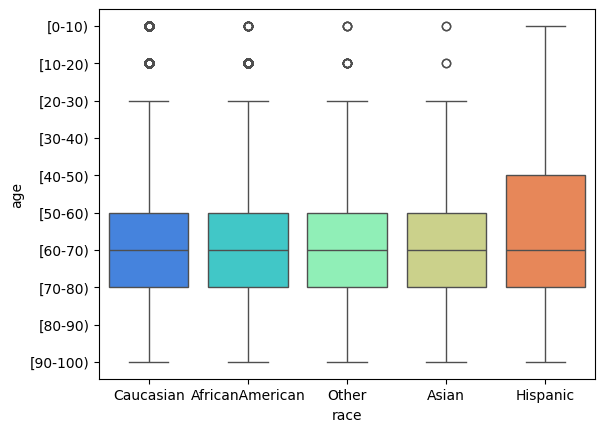

In [478]:
sns.boxplot(df, x='race', y='age', palette='rainbow')

In [479]:
df['admission_type_desc'].unique()

array([nan, 'Emergency', 'Urgent', 'Elective', 'Newborn', 'Not Available',
       'Not Mapped', 'Trauma Center'], dtype=object)

In [480]:
df['discharge_desc'].unique()

array(['Not Mapped', 'Discharged to home',
       'Discharged/transferred to SNF',
       'Discharged/transferred to home with home health service',
       'Discharged/transferred to another short term hospital',
       'Discharged/transferred to another type of inpatient care institution',
       'Expired', 'Left AMA',
       'Neonate discharged to another hospital for neonatal aftercare',
       'Discharged/transferred to ICF', 'Hospice / medical facility', nan,
       'Discharged/transferred to home under care of Home IV provider',
       'Hospice / home',
       'Still patient or expected to return for outpatient services',
       'Discharged/transferred/referred another institution for outpatient services',
       'Discharged/transferred/referred to this institution for outpatient services',
       'Discharged/transferred to another rehab fac including rehab units of a hospital .',
       'Discharged/transferred to a long term care hospital.',
       'Admitted as an inpatient to t

In [481]:
df['admission_source_desc'].unique()

array([' Physician Referral', ' Emergency Room', 'Clinic Referral',
       'Transfer from a hospital',
       ' Transfer from a Skilled Nursing Facility (SNF)',
       ' Transfer from another health care facility', ' Not Mapped',
       'HMO Referral', nan, ' Court/Law Enforcement', ' Not Available',
       ' Extramural Birth', ' Transfer from critial access hospital',
       ' Transfer from hospital inpt/same fac reslt in a sep claim',
       'Normal Delivery', ' Transfer from Ambulatory Surgery Center',
       ' Sick Baby'], dtype=object)

## Data Pre-processing (cleaning, transformation, handling missing values, etc.)

## Univariate Analysis

## Bivariate Analysis

## Multivariate Analysis

## Summarize insights